In [1]:
from IPython.display import Image

# Primera forma

Para este caso vamos a resolver un sistema de ecuaciones diferenciales de dos variables, $x$, $y$ tomando en cuenta que las ecuaciones difernciales pueden ser de la siguiente forma: 
\begin{equation}
\begin{split}
&\frac{dX}{dt}=aX+bY+cXY+d\\
&\frac{dY}{dt}=eX+fY+gXY+h
\end{split}
\end{equation}

# Librería solve_ivp

Intentaremos hacer uno con la librería solve_ivp

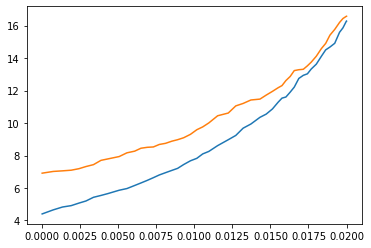

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp

def f(t,y):
    #constantes
    a=random.uniform(0,10)
    b=random.uniform(0,10)
    c=random.uniform(0,10)
    d=random.uniform(0,10)
    e=random.uniform(0,10)
    f=random.uniform(0,10)
    g=random.uniform(0,10)
    h=random.uniform(0,10)
    
    #asignar a cada ODE a un elemento de vector
    X=y[0]
    Y=y[1]
    
    #definimos cada ODE
    dX_dt=a*X+b*Y+c*X*Y+d
    dY_dt=e*X+f*Y+g*X*Y+h
    
    return [dX_dt,dY_dt]

#Declaramos el vector de tiempo
t_span=[0,0.02]
times=np.linspace(t_span[0], t_span[1], 101)

#Definimos las condiciones iniciales
y0=np.array([random.uniform(0,10),random.uniform(0,10)])


#Resolvemos
sol=solve_ivp(f, t_span, y0)
tiempo= sol.t
var1= sol.y[0]
var2= sol.y[1]

#Graficamos
plt.plot(tiempo,var1)
plt.plot(tiempo,var2)
plt.show()

Como vemos que funcionó, intentaremos hacerlo con constantes fijas para resolverlo por otro software (Matlab Simulink)

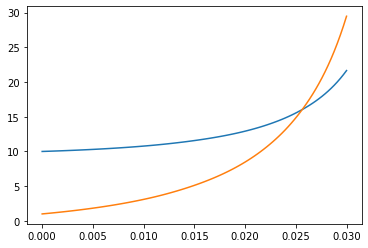

In [11]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp

def f(t,y):
    #constantes
    a=1
    b=2
    c=3
    d=4
    e=5
    f=6
    g=7
    h=8
    
    #asignar a cada ODE a un elemento de vector
    X=y[0]
    Y=y[1]
    
    #definimos cada ODE
    dX_dt=a*X+b*Y+c*X*Y+d
    dY_dt=e*X+f*Y+g*X*Y+h
    
    return [dX_dt,dY_dt]

#Declaramos el vector de tiempo
t_span=[0,0.03]
times=np.linspace(t_span[0], t_span[1], 100)

#Definimos las condiciones iniciales
y0=np.array([10,1])


#Resolvemos
sol=solve_ivp(f, t_span, y0,t_eval=times)
tiempo= sol.t
var1= sol.y[0]
var2= sol.y[1]

#Graficamos
plt.plot(tiempo,var1)
plt.plot(tiempo,var2)
plt.show()

# Interruptor genético Toggle Switch

Como vemos que funcionó todo lo anterior, y con MATLAB da los mismos resutlados, intentaremos dar solución a un tipo concreto de sistemas de ecuaciones diferenciales, que modelan dos genes que se reprimen mutuamente, llamado el interruptor Toggle Switch.
![title](https://francisthemulenews.files.wordpress.com/2009/10/dibujo20091025_toggle_switch_simplified_mathematical_model_and_genetic_circuit.png)


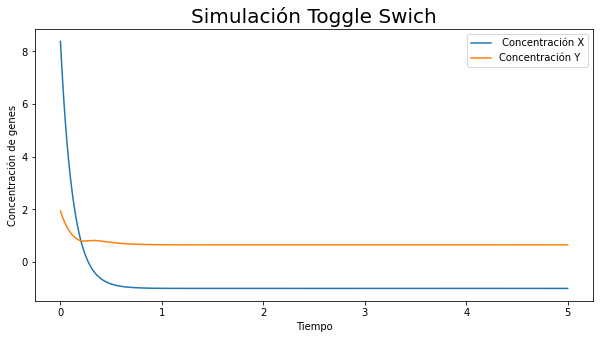

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


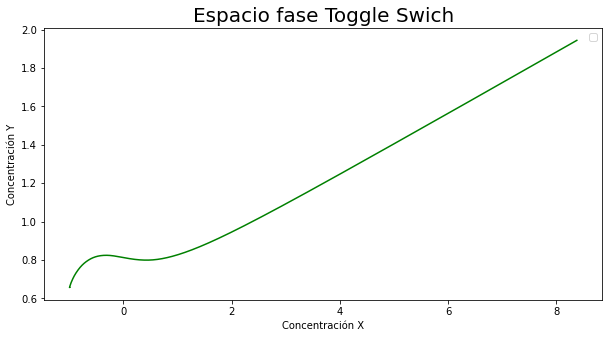

In [50]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp

#constantes
a1=random.uniform(-10,10)
a2=random.uniform(-10,10)
b1=random.uniform(-10,10)
b2=random.uniform(-10,10)
d1=random.uniform(-10,10)
d2=random.uniform(-10,10)
n=2

def f(t,y):
    
    a1==a1
    a2==a2
    b1==b1
    b2==b2
    d1==d1
    d2==d2
    n==n
    
    #asignar a cada ODE a un elemento de vector
    X=y[0]
    Y=y[1]
    
    #definimos cada ODE
    dX_dt=a1/(1+Y**n)-d1*X+b1
    dY_dt=a2/(1+X**n)-d2*Y+b2
    
    return [dX_dt,dY_dt]

#Declaramos el vector de tiempo
t_span=[0,5]
times=np.linspace(t_span[0], t_span[1], 7000)

#Definimos las condiciones iniciales
y0=np.array([random.uniform(0,10),random.uniform(0,10)])


#Resolvemos
sol=solve_ivp(f, t_span, y0,t_eval=times) #Modificar manualmente el intervalo de tiempo
#sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
tiempo= sol.t
var1= sol.y[0]
var2= sol.y[1]

#Graficamos
plt.figure(figsize=(10,5))
plt.plot(tiempo,var1, label=" Concentración X")
plt.plot(tiempo,var2, label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(var1,var2, "g")
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')
plt.title('Espacio fase Toggle Swich', fontsize=20)
plt.legend()
plt.show()

# Campo vecotrial del espacio fase

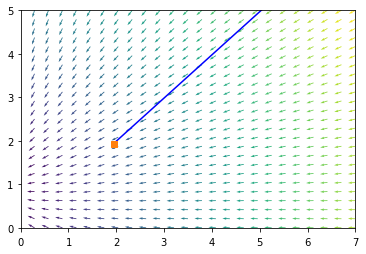

In [51]:

plt.plot(sol.y[:,0], sol.y[:,1], 'b-') # path
plt.plot([sol.y[0,0]], [sol.y[0,1]], 'o') # start
plt.plot([sol.y[-1,0]], [sol.y[-1,1]], 's') # end

############3
#x_range=40000000.0
x_range=7
y_range=5

y1 = np.linspace(0.0, x_range, 25)
y2 = np.linspace(0.0, y_range, 25)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

u,v = f(t,[Y1, Y2])
M = (np.hypot(u,v))
u /= M
v /= M

Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')

plt.xlabel('')
plt.ylabel('')
plt.xlim([0, x_range])
plt.ylim([0, y_range])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText='True')


# Coeficientes enteros

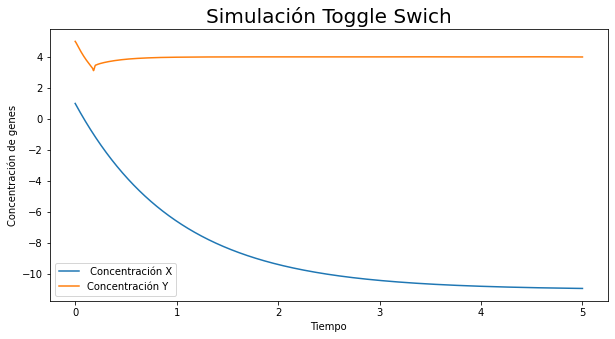

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


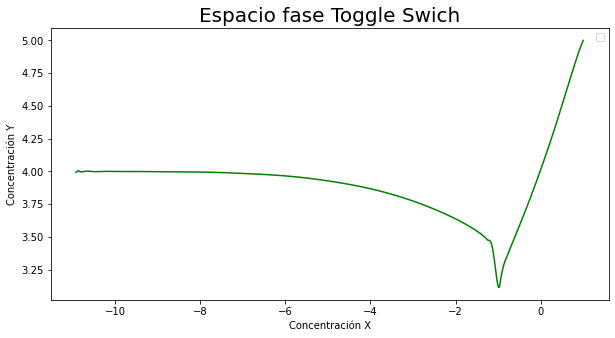

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp
    
#constantes
a1=random.randint(-10,10)
a2=random.randint(-10,10)
b1=random.randint(-10,10)
b2=random.randint(-10,10)
d1=random.randint(-10,10)
d2=random.randint(-10,10)
n=random.randint(-10,10)

def f(t,y):

    #asignar a cada ODE a un elemento de vector
    X=y[0]
    Y=y[1]
    
    #definimos cada ODE
    dX_dt=a1/(1+Y**n)-d1*X+b1
    dY_dt=a2/(1+X**n)-d2*Y+b2
    
    return [dX_dt,dY_dt]

#Declaramos el vector de tiempo
t_span=[0,5]
times=np.linspace(t_span[0], t_span[1], 7000)

#Definimos las condiciones iniciales
y0=np.array([random.randint(0,10),random.randint(0,10)])


#Resolvemos
sol=solve_ivp(f, t_span, y0,t_eval=times) #Modificar manualmente el intervalo de tiempo
#sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
tiempo= sol.t
var1= sol.y[0]
var2= sol.y[1]

#Graficamos
plt.figure(figsize=(10,5))
plt.plot(tiempo,var1, label=" Concentración X")
plt.plot(tiempo,var2, label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(var1,var2, "g")
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')
plt.title('Espacio fase Toggle Swich', fontsize=20)
plt.legend()
plt.show()

# Guardando datos como pickle (una columna)

In [39]:
import pandas as pd
import pickle
varf=np.append(var1,var2)
df=pd.DataFrame(varf)
df1=df.transpose()
df1.to_pickle("Una_fila.pkl")
df1

,0,1,2,3,4,5,6,7,8,9,...,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999
0,5.0,5.024802,5.017595,4.974515,4.958829,4.949397,4.953081,4.947103,4.957429,4.989956,...,3.924611,3.958912,3.962348,3.979417,3.926741,3.910883,3.935181,3.922004,3.914034,3.904362


# Guardando datos como pickle (n columnas)

In [40]:
import pandas as pd
import pickle
filas=[1,1]
var1=var1.reshape(1,-1)
var2=var2.reshape(1,-1)
varf=np.append(var1,var2,axis=0)
df2=pd.DataFrame(varf,filas)
df2.to_pickle("Dos_filas.pkl")
df2

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
1,5.0,5.024802,5.017595,4.974515,4.958829,4.949397,4.953081,4.947103,4.957429,4.989956,...,4.039700,4.036152,4.053282,4.017886,4.003962,4.002663,4.000992,3.980589,3.961363,3.945350
1,3.0,2.994999,2.996914,3.017549,3.023554,3.007358,2.987295,2.991303,3.001205,2.991834,...,3.924611,3.958912,3.962348,3.979417,3.926741,3.910883,3.935181,3.922004,3.914034,3.904362


In [42]:
aver=pd.read_pickle("Dos_filas.pkl")
aver

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
1,5.0,5.024802,5.017595,4.974515,4.958829,4.949397,4.953081,4.947103,4.957429,4.989956,...,4.039700,4.036152,4.053282,4.017886,4.003962,4.002663,4.000992,3.980589,3.961363,3.945350
1,3.0,2.994999,2.996914,3.017549,3.023554,3.007358,2.987295,2.991303,3.001205,2.991834,...,3.924611,3.958912,3.962348,3.979417,3.926741,3.910883,3.935181,3.922004,3.914034,3.904362
